In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft
from scipy import signal
import math
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum
from scipy.spatial import distance

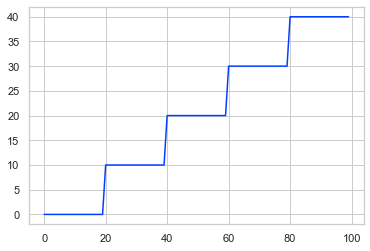

In [144]:
t = np.arange(0, 100)
s = np.zeros(100)
s[0:20] = 0
s[20:40] = 10
s[40:60] = 20
s[60:80] = 30
s[80:100] = 40
plt.plot(t, s)

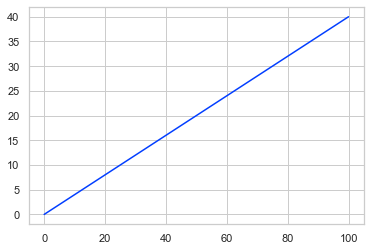

In [145]:
t2 = 2.5*np.linspace(0, 40, 100)
s2 = np.linspace(0, 40, 100)
plt.plot(t2, s2)

In [146]:
from scipy.stats import wasserstein_distance

In [147]:
wasserstein_distance(s,s2)

2.929292929292929

In [148]:
signal_1 = pd.DataFrame(zip(t,s),columns=['Time','Value'])
signal_2 = pd.DataFrame(zip(t2,s2),columns=['Time','Value'])

In [149]:
def jaccard(dff, dfj):
    a = 0
    intersect =[]
    union = []
    n1 = np.array(dff.Value)
    n2 = np.array(dfj.Value)
    n1 = np.append(n1,n2.max())
    n1 = np.append(n1,n2.min())
    n2 = np.append(n2,n1.max())
    n2 = np.append(n2,n1.min())
    count1, bin_edges1 = np.histogram(n2, bins=20)
    count2, bin_edges2 = np.histogram(n1, bins=20)

    for x in range(count1.shape[0]):
        intersect.append(min(count1[x],count2[x]))
    intersect = np.array([intersect])
    isum = intersect.sum()

    for x in range(count1.shape[0]):
        union.append(max(count1[x],count2[x]))
    union = np.array([union])
    usum = union.sum()

    jacc1 = isum/usum
            #x = wasserstein_distance(dff.value,dfj.value)
    a = jacc1
    return a

In [150]:
jaccard(signal_1,signal_2)

0.15254237288135594

# FFT - Real and Imag

In [151]:
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,yf.real),columns=['Freq','Ampli'])
    fft_data2 = pd.DataFrame(zip(f,yf.imag),columns=['Freq','Ampli'])
    return fft_data1,fft_data2

<StemContainer object of 3 artists>

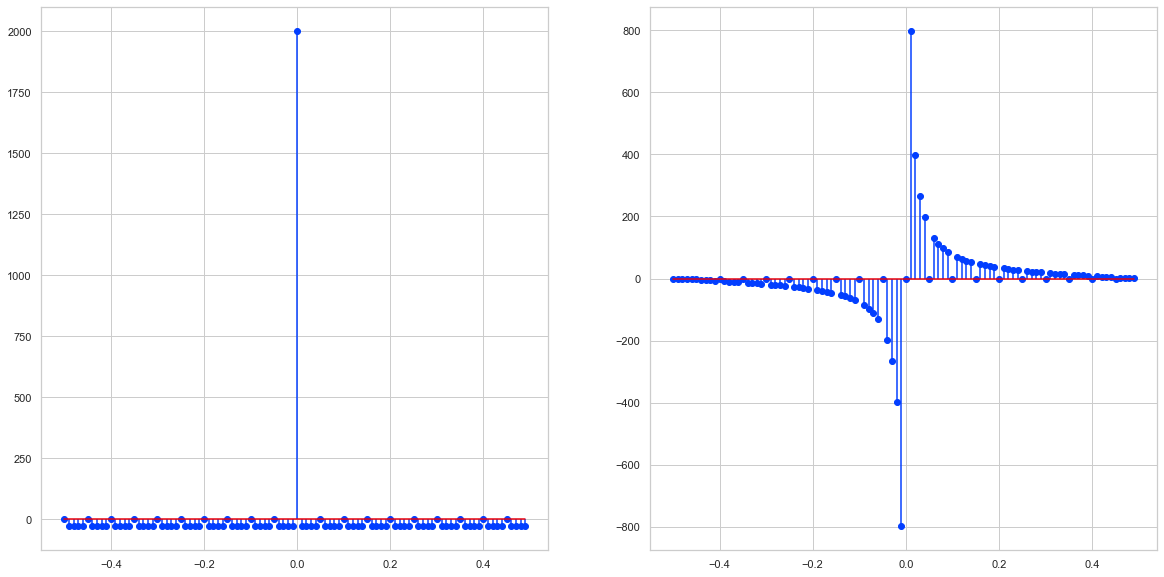

In [180]:
freq_ampli1,freq_ampli1i = freq(signal_1)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
#axs[1].set_xlim(-0.1, 0.1)

<StemContainer object of 3 artists>

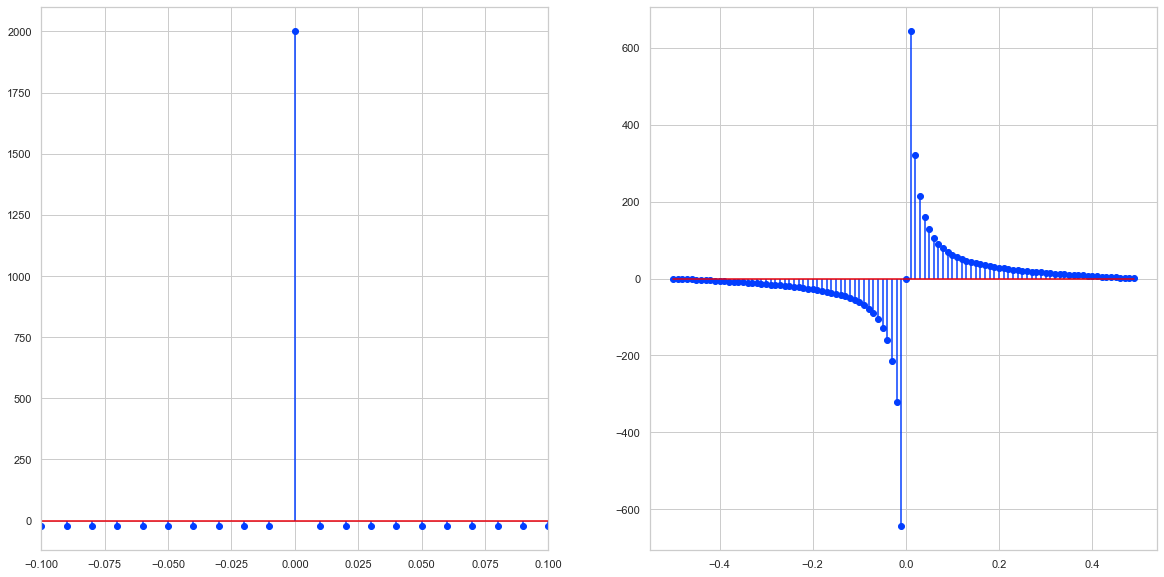

In [153]:
freq_ampli2,freq_ampli2i = freq(signal_2)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli2['Freq'], freq_ampli2['Ampli'])
axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli2i['Freq'], freq_ampli2i['Ampli'])

In [154]:
print("Real: ",wasserstein_distance(freq_ampli1['Ampli'], freq_ampli2['Ampli']))
print("Imaginary", wasserstein_distance(freq_ampli1i['Ampli'], freq_ampli2i['Ampli']))

Real:  7.676767676767664
Imaginary 9.241886205576499


In [155]:
freq_ampli1.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli2.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli1,freq_ampli2))
freq_ampli1.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli2.rename(columns = {'Value': 'Ampli'}, inplace = True)

1.0


In [156]:
freq_ampli1i.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli2i.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli1i,freq_ampli2i))
freq_ampli1i.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli2i.rename(columns = {'Value': 'Ampli'}, inplace = True)

0.8545454545454545


# FFT - Magnitude and phase

In [157]:
#Func gives magnitude of FFT provide dataframe in Time Domain
def freq_mag(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data = pd.DataFrame(zip(f,np.abs(yf)),columns=['Freq','Ampli'])
    return fft_data

In [158]:
def freq_phase(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,np.angle(yf)),columns=['Freq','Phase'])
    return fft_data1

<StemContainer object of 3 artists>

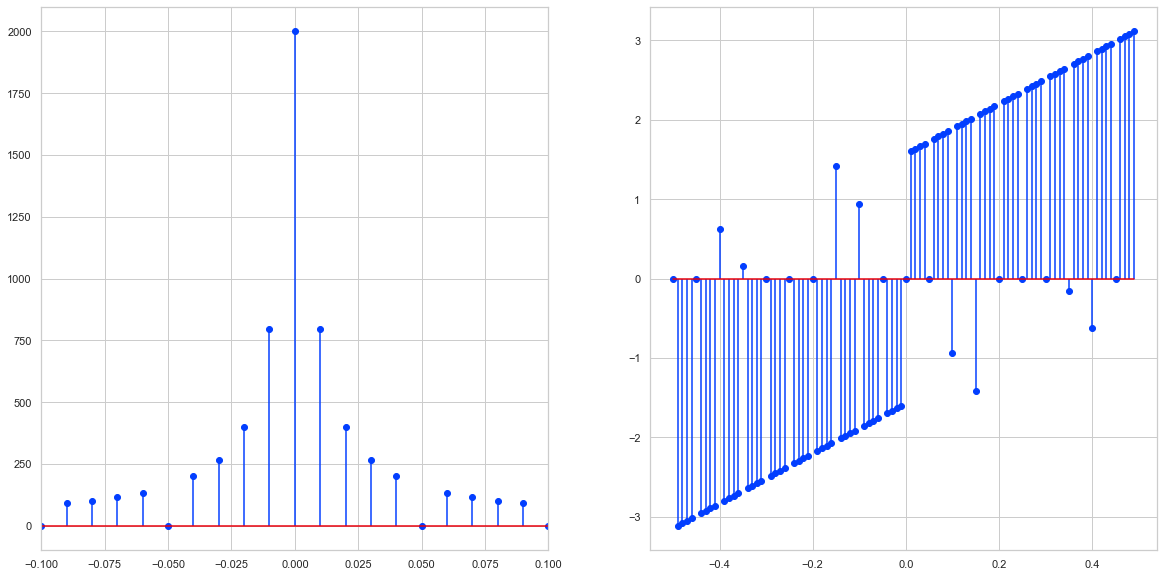

In [159]:
freq_ampli_mag1 = freq_mag(signal_1)
freq_ampli_phase1 = freq_phase(signal_1)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli_mag1['Freq'], freq_ampli_mag1['Ampli'])
axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_phase1['Freq'], freq_ampli_phase1['Phase'])

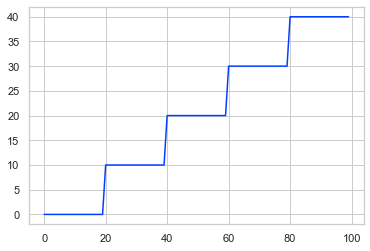

In [160]:
import math
import numpy.fft as FFT
def inverse_mag_phase(df1, df2):
    mag = df1['Ampli'].to_numpy()
    phase = df2['Phase'].to_numpy()
    for_ifft = [[] for i in range(len(mag))]
    for i in range(len(mag)):
            rl = mag[i]*math.cos(phase[i])
            im = mag[i]*math.sin(phase[i])
            for_ifft[i].append(complex(rl,im))
    ifftc = FFT.ifft2(for_ifft)
    return ifftc
ifft_mag_phase1 = inverse_mag_phase(freq_ampli_mag1, freq_ampli_phase1)
plt.plot(ifft_mag_phase1)

In [161]:
from scipy.spatial import distance
distance.euclidean(s,ifft_mag_phase1)

2.907978072214365e-14

<StemContainer object of 3 artists>

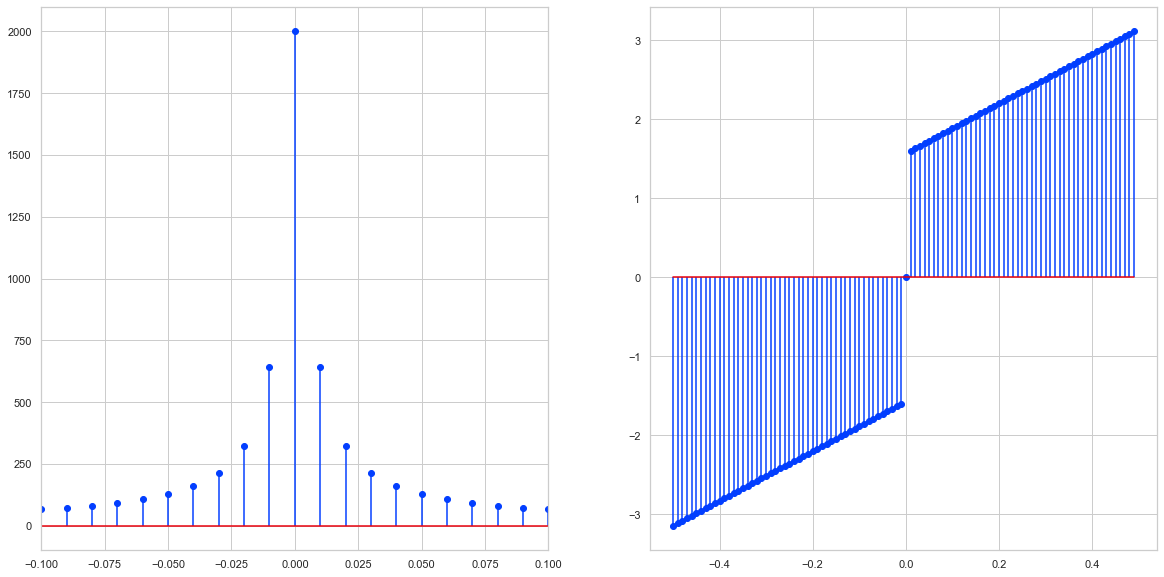

In [162]:
freq_ampli_mag2 = freq_mag(signal_2)
freq_ampli_phase2 = freq_phase(signal_2)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli_mag2['Freq'], freq_ampli_mag2['Ampli'])
axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_phase2['Freq'], freq_ampli_phase2['Phase'])

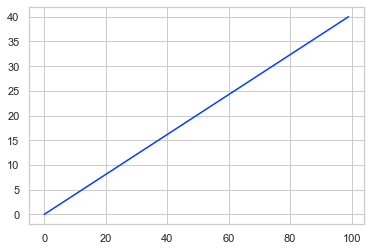

In [163]:
ifft_mag_phase2 = inverse_mag_phase(freq_ampli_mag2, freq_ampli_phase2)
plt.plot(ifft_mag_phase2)

In [164]:
distance.euclidean(s2,ifft_mag_phase2)

5.305588931765927e-14

In [165]:
print("Magnitude: ",(wasserstein_distance(freq_ampli_mag1['Ampli'], freq_ampli_mag2['Ampli'])))
print("Phase", wasserstein_distance(freq_ampli_phase1['Phase'], freq_ampli_phase2['Phase']))

Magnitude:  12.308618117207757
Phase 0.39269908169872414


In [166]:
freq_ampli_mag1.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli_mag2.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli_mag1,freq_ampli_mag2))
freq_ampli_mag1.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli_mag2.rename(columns = {'Value': 'Ampli'}, inplace = True)

0.9245283018867925


In [167]:
freq_ampli_phase1.rename(columns = {'Phase':'Value'}, inplace = True)
freq_ampli_phase2.rename(columns = {'Phase':'Value'}, inplace = True)
print(jaccard(freq_ampli_phase1,freq_ampli_phase2))
freq_ampli_phase1.rename(columns = {'Value': 'Phase'}, inplace = True)
freq_ampli_phase2.rename(columns = {'Value': 'Phase'}, inplace = True)

0.6859504132231405


# Cepstrum

In [168]:
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum

In [169]:
duration = signal_1.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps1, _ = complex_cepstrum(signal_1['Value'])
print(ceps1)

[-inf -inf  inf  inf -inf -inf  nan  inf  inf  nan -inf  nan  inf  inf
  nan -inf -inf  nan  inf  nan -inf -inf  inf  inf -inf -inf  nan  inf
  inf  nan -inf  nan  inf  inf  nan -inf -inf  nan  inf  nan -inf -inf
  inf  inf -inf -inf  nan  inf  inf  nan -inf  nan  inf  inf  nan -inf
 -inf  nan  inf  nan -inf -inf  inf  inf -inf -inf  nan  inf  inf  nan
 -inf  nan  inf  inf  nan -inf -inf  nan  inf  nan -inf -inf  inf  inf
 -inf -inf  nan  inf  inf  nan -inf  nan  inf  inf  nan -inf -inf  nan
  inf  nan]


In [170]:
duration = signal_2.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps2, _ = complex_cepstrum(signal_2['Value'])
print(ceps2)

[ 3.69189781e+00 -6.86626877e-03 -6.69809184e-03 -6.52737555e-03
 -6.35404831e-03 -6.17803565e-03 -5.99926006e-03 -5.81764082e-03
 -5.63309384e-03 -5.44553147e-03 -5.25486231e-03 -5.06099101e-03
 -4.86381803e-03 -4.66323941e-03 -4.45914653e-03 -4.25142583e-03
 -4.03995851e-03 -3.82462025e-03 -3.60528083e-03 -3.38180381e-03
 -3.15404615e-03 -2.92185774e-03 -2.68508104e-03 -2.44355051e-03
 -2.19709218e-03 -1.94552302e-03 -1.68865036e-03 -1.42627127e-03
 -1.15817180e-03 -8.84126233e-04 -6.03896276e-04 -3.17230121e-04
 -2.38614751e-05  2.76491509e-04  5.84127406e-04  8.99362796e-04
  1.22253366e-03  1.55399690e-03  1.89413204e-03  2.24334304e-03
  2.60206033e-03  2.97074304e-03  3.34988147e-03  3.73999981e-03
  4.14165912e-03  4.55546069e-03  4.98204977e-03  5.42211964e-03
  5.87641627e-03  6.34574343e-03  6.83096845e-03  7.33302869e-03
  7.85293884e-03  8.39179904e-03  8.95080424e-03  9.53125463e-03
  1.01345676e-02  1.07622914e-02  1.14161204e-02  1.20979134e-02
  1.28097136e-02  1.35537

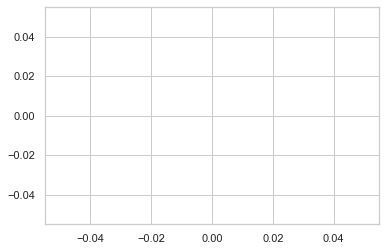

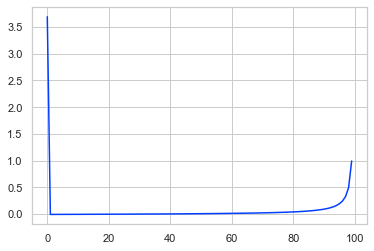

In [171]:
plt.plot(ceps1)
plt.show()
plt.plot(ceps2)

In [172]:
print(wasserstein_distance(ceps1,ceps2))

nan


In [173]:
cepstrum1 = pd.DataFrame(ceps1,columns=['Value'])
cepstrum2 = pd.DataFrame(ceps2,columns=['Value'])

In [174]:
#print(jaccard(cepstrum1,cepstrum2))

## Results

In [175]:
from prettytable import PrettyTable

+-------------+---------------+---------------+-------------------+---------------------+
| Signal Type |    Signal 1   |    Signal 2   |        EMD        |       Jaccard       |
+-------------+---------------+---------------+-------------------+---------------------+
| Time Series | Multi Sines 1 | Multi Sines 2 | 2.929292929292929 | 0.15254237288135594 |
+-------------+---------------+---------------+-------------------+---------------------+


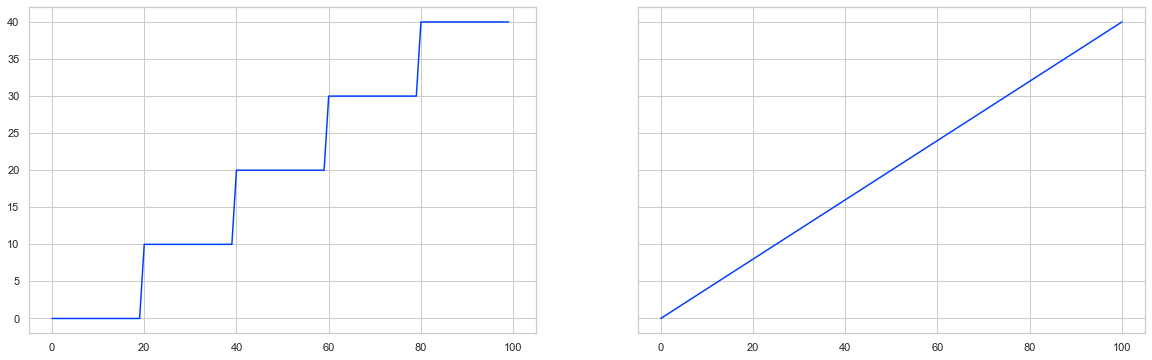

In [176]:
fig, axs = plt.subplots(1,2,figsize=(20,6), sharex=True, sharey=True)
axs[0].plot(signal_1["Time"],signal_1['Value'])
axs[1].plot(signal_2["Time"],signal_2['Value'])
table = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table.add_row(['Time Series','Multi Sines 1','Multi Sines 2',wasserstein_distance(s,s2),jaccard(signal_1,signal_2)])
print(table)

+-------------+---------------+---------------+-------------------+--------------------+
| Signal Type |    Signal 1   |    Signal 2   |        EMD        |      Jaccard       |
+-------------+---------------+---------------+-------------------+--------------------+
|    Freq_R   | Multi Sines 1 | Multi Sines 2 | 7.676767676767664 |        1.0         |
|    Freq_I   | Multi Sines 1 | Multi Sines 2 | 9.241886205576499 | 0.8545454545454545 |
+-------------+---------------+---------------+-------------------+--------------------+


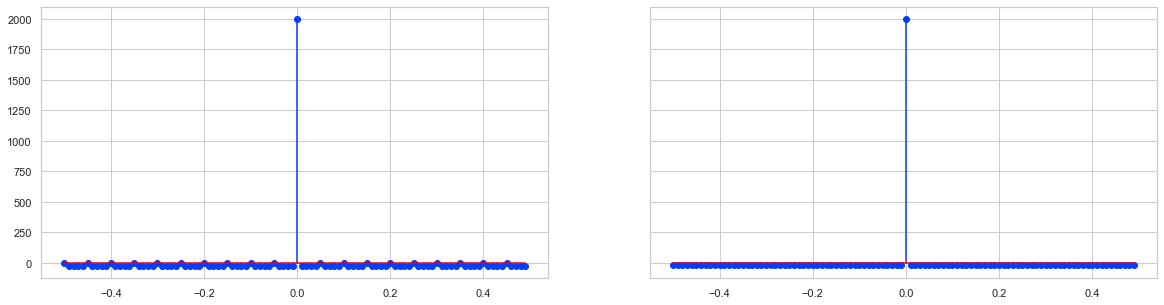

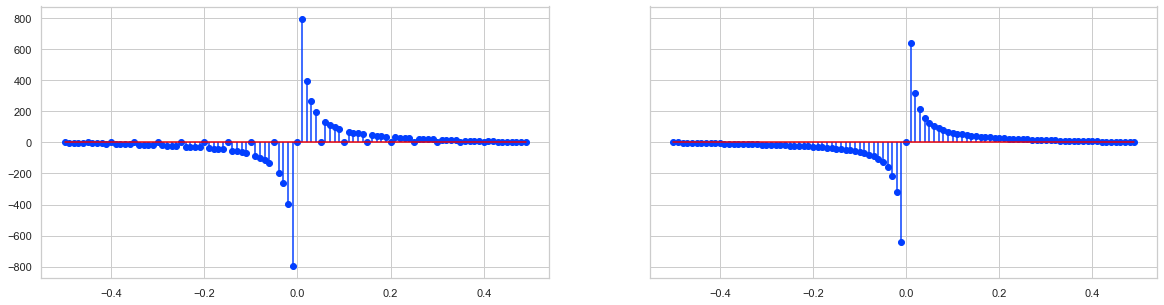

In [187]:
fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli2['Freq'], freq_ampli2['Ampli'])
#axs[1].set_xlim(-0.1, 0.1)

fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
axs[1].stem(freq_ampli2i['Freq'], freq_ampli2i['Ampli'])

table2 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table2.add_row(['Freq_R','Multi Sines 1','Multi Sines 2',7.676767676767664,1.0])
table2.add_row(['Freq_I','Multi Sines 1','Multi Sines 2',9.241886205576499, 0.8545454545454545])
print(table2)

+-------------+---------------+---------------+---------------------+--------------------+
| Signal Type |    Signal 1   |    Signal 2   |         EMD         |      Jaccard       |
+-------------+---------------+---------------+---------------------+--------------------+
|   Freq_Mag  | Multi Sines 1 | Multi Sines 2 |  12.308618117207757 | 0.9245283018867925 |
|  Freq_Phase | Multi Sines 1 | Multi Sines 2 | 0.39269908169872414 | 0.6859504132231405 |
+-------------+---------------+---------------+---------------------+--------------------+


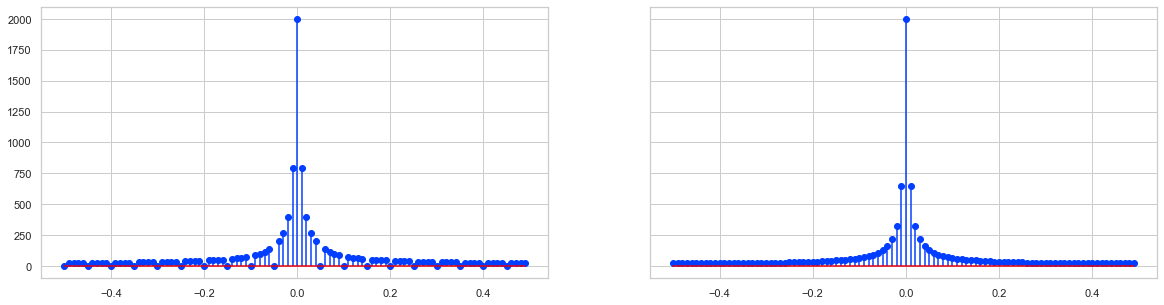

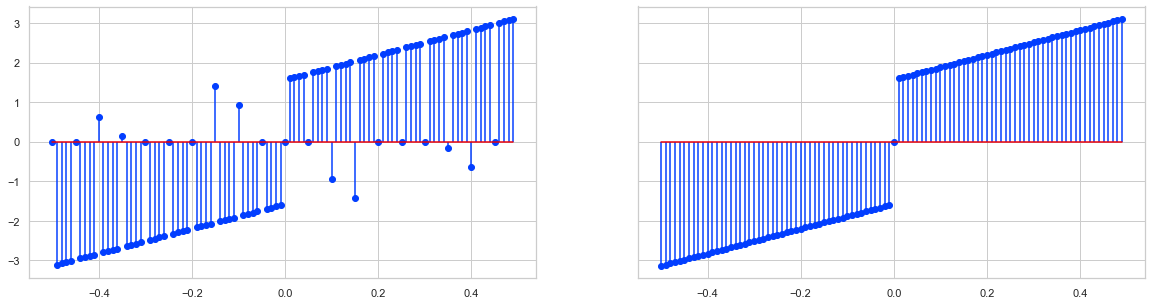

In [185]:
fig, axs = plt.subplots(1,2,figsize=(20,5), sharex=True, sharey=True)
axs[0].stem(freq_ampli_mag1['Freq'], freq_ampli_mag1['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_mag2['Freq'], freq_ampli_mag2['Ampli'])
#axs[1].set_xlim(-0.1, 0.1)

fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli_phase1['Freq'], freq_ampli_phase1['Phase'])
axs[1].stem(freq_ampli_phase2['Freq'], freq_ampli_phase2['Phase'])

table3 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table3.add_row(['Freq_Mag','Multi Sines 1','Multi Sines 2',12.308618117207757,0.9245283018867925])
table3.add_row(['Freq_Phase','Multi Sines 1','Multi Sines 2',0.39269908169872414,0.6859504132231405])
print(table3)

In [183]:
'''fig, axs = plt.subplots(1,2,figsize=(20,6), sharex = True, sharey = True)
axs[0].plot(ceps1)
axs[1].plot(ceps2)
table4 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table4.add_row(['Cepstrum','Multi Sines 1','Multi Sines 2',wasserstein_distance(ceps1,ceps2),jaccard(cepstrum1,cepstrum2)])
print(table4)'''

"fig, axs = plt.subplots(1,2,figsize=(20,6), sharex = True, sharey = True)\naxs[0].plot(ceps1)\naxs[1].plot(ceps2)\ntable4 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])\ntable4.add_row(['Cepstrum','Multi Sines 1','Multi Sines 2',wasserstein_distance(ceps1,ceps2),jaccard(cepstrum1,cepstrum2)])\nprint(table4)"